In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset

df = pd.read_csv(r'C:\Users\ahmed\OneDrive\Documents\sales_data_for_python_project.csv')

In [ ]:
# Data overview

df.head()

,transaction_id,customer_id,gender,age,region,product_category,quantity,price_per_unit,purchase_date,total_amount
0,1.0,1051.0,Male,51.0,North,Clothing,4.0,589.20,2023-11-09,2356.80
1,2.0,1092.0,Female,38.0,East,Beauty,2.0,915.82,2023-10-14,1831.64
2,3.0,1014.0,Male,47.0,West,Beauty,3.0,NaN,2023-05-14,1985.43
3,4.0,1071.0,Male,50.0,West,Clothing,1.0,205.21,2023-08-07,205.21
4,5.0,1060.0,Male,45.0,East,NaN,1.0,945.85,2023-06-17,945.85


In [ ]:
# Check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    195 non-null    float64
 1   customer_id       195 non-null    float64
 2   gender            195 non-null    object 
 3   age               195 non-null    float64
 4   region            195 non-null    object 
 5   product_category  195 non-null    object 
 6   quantity          195 non-null    float64
 7   price_per_unit    195 non-null    float64
 8   purchase_date     195 non-null    object 
 9   total_amount      195 non-null    float64
dtypes: float64(6), object(4)
memory usage: 16.8+ KB


In [ ]:
# check dataset shape

df.shape

(205, 10)

In [ ]:
# View dataset summary statistics

df.describe()

,transaction_id,customer_id,age,quantity,price_per_unit,total_amount
count,204.000000,204.000000,204.000000,204.000000,204.000000,203.000000
mean,99.774510,1049.122549,39.602941,2.460784,533.514461,1320.632069
std,57.815301,29.688692,12.072612,1.097885,259.964604,899.034352
min,1.000000,1000.000000,18.000000,1.000000,104.170000,104.170000
25%,49.750000,1024.500000,29.000000,2.000000,297.057500,612.780000
50%,99.500000,1051.500000,41.000000,2.000000,531.775000,1049.720000
75%,149.250000,1074.250000,50.000000,3.000000,753.230000,1907.550000
max,200.000000,1099.000000,59.000000,4.000000,997.190000,3943.840000


In [ ]:
# Check null values

df.isnull().sum()

transaction_id      0
customer_id         0
gender              0
age                 0
region              0
product_category    0
quantity            0
price_per_unit      0
purchase_date       0
total_amount        0
dtype: int64

In [ ]:
# Remove null Values

df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
# Check duplicate rows

df.duplicated().sum()

np.int64(5)

In [ ]:
# Drop duplicate rows

df_cleaned = df.dropna().drop_duplicates()

In [ ]:
# Group By region and calculate total sales 

df_cleaned.groupby('region')['total_amount'].sum().sort_values(ascending=False)

region
North    81073.27
South    62668.01
East     53180.02
West     50106.34
Name: total_amount, dtype: float64

In [ ]:
# top 5 customers

df_cleaned.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head()

customer_id
1061.0    12715.21
1059.0     8995.28
1062.0     8468.98
1032.0     7998.18
1014.0     7938.21
Name: total_amount, dtype: float64

In [ ]:
# Change data types

df_cleaned['purchase_date'] = pd.to_datetime(df_cleaned['purchase_date'])
df_cleaned.set_index('purchase_date', inplace=True)
monthly_sales = df_cleaned['total_amount'].resample('M').sum()
print(monthly_sales)


purchase_date
2023-01-31    24324.25
2023-02-28    14942.80
2023-03-31    25807.69
2023-04-30    12228.90
2023-05-31    15256.87
2023-06-30    19756.82
2023-07-31    25025.10
2023-08-31    22253.55
2023-09-30    21557.50
2023-10-31    22076.17
2023-11-30    23980.00
2023-12-31    19817.99
Freq: ME, Name: total_amount, dtype: float64


C:\Users\ahmed\AppData\Local\Temp\ipykernel_34792\4186395551.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_cleaned['total_amount'].resample('M').sum()


In [10]:
df_cleaned[['quantity','price_per_unit','total_amount','age']].corr()

,quantity,price_per_unit,total_amount,age
quantity,1.000000,0.031602,0.645415,0.002085
price_per_unit,0.031602,1.000000,0.719990,-0.093281
total_amount,0.645415,0.719990,1.000000,-0.086465
age,0.002085,-0.093281,-0.086465,1.000000


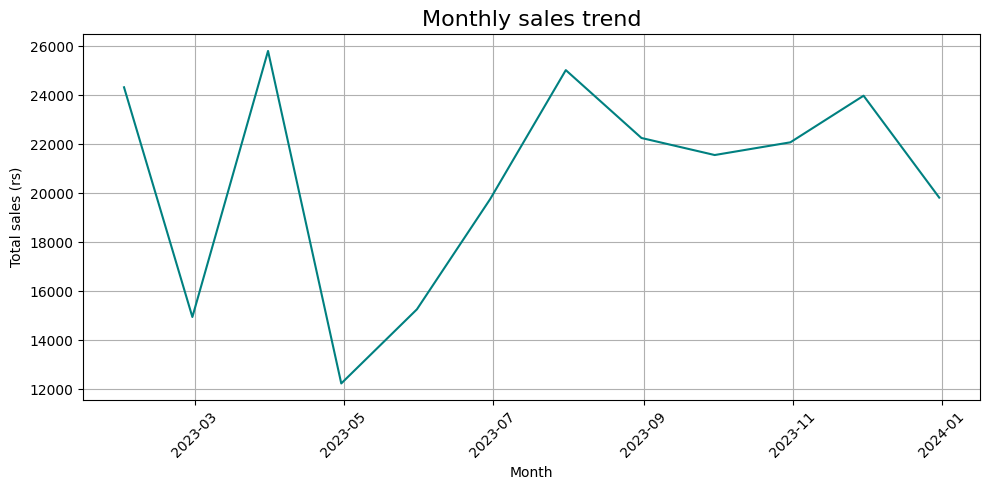

In [ ]:
# Monthly sales trend by line chart

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index,y= monthly_sales.values, markers='0',color='teal')
plt.title("Monthly sales trend", fontsize = 16)
plt.xlabel("Month")
plt.ylabel("Total sales (rs)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
region_sales = df_cleaned.groupby('region')['total_amount'].sum().sort_values(ascending=False)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34792\153190122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


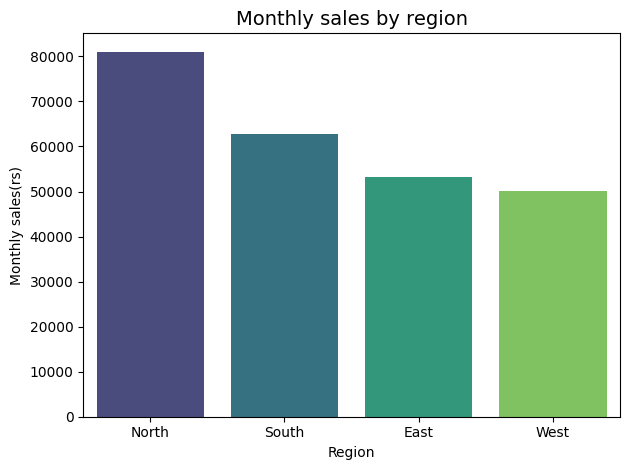

In [ ]:
# Monthly sales by region bar chart

plt.Figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Monthly sales by region",fontsize=14)
plt.xlabel("Region")
plt.ylabel("Monthly sales(rs)")
plt.tight_layout()
plt.show()


In [14]:
category_sales =df_cleaned.groupby('product_category')['total_amount'].sum().sort_values()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34792\1346055757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values,y=category_sales.index,palette="rocket")


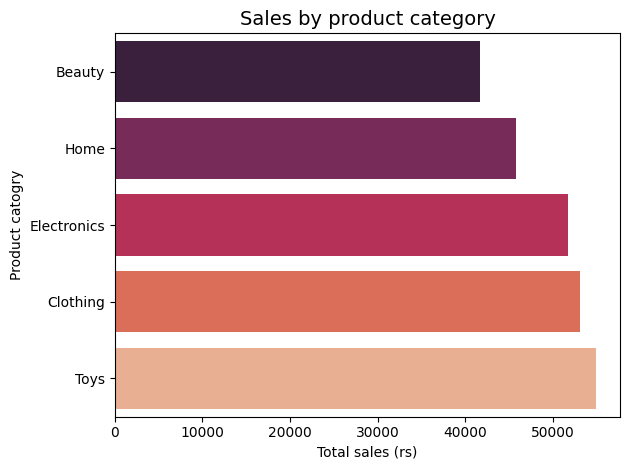

In [ ]:
# Sales by product category by horizontal bar chart

plt.Figure(figsize=(8,5))
sns.barplot(x=category_sales.values,y=category_sales.index,palette="rocket")
plt.title("Sales by product category", fontsize=14)
plt.xlabel("Total sales (rs)")
plt.ylabel("Product catogry")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

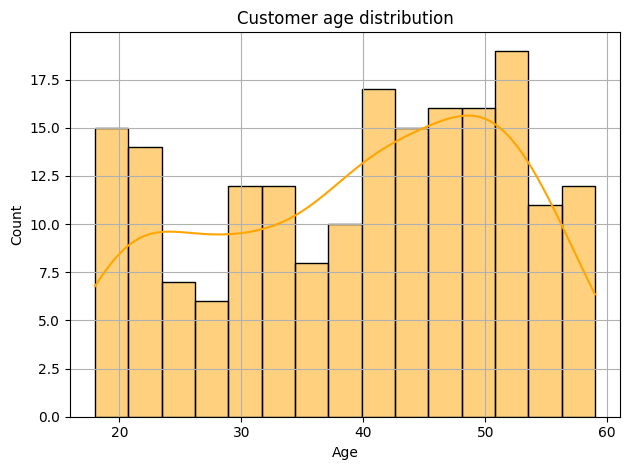

In [ ]:
# Customer age distribution by histogram with kde

plt.Figure(figsize=(8,4))
sns.histplot(data=df_cleaned,x='age',bins=15,kde=True,color='orange')
plt.title("Customer age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show


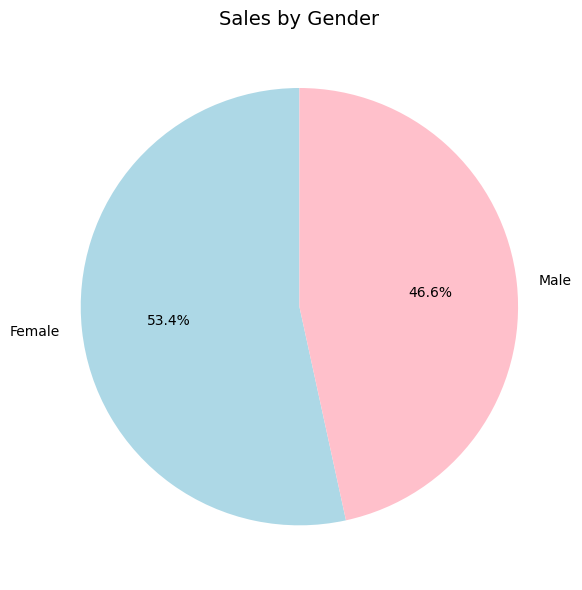

In [ ]:
# Sales by gender pie chart

gender_sales = df_cleaned.groupby('gender')['total_amount'].sum()

plt.figure(figsize=(6, 6))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Sales by Gender", fontsize=14)
plt.tight_layout()
plt.show()

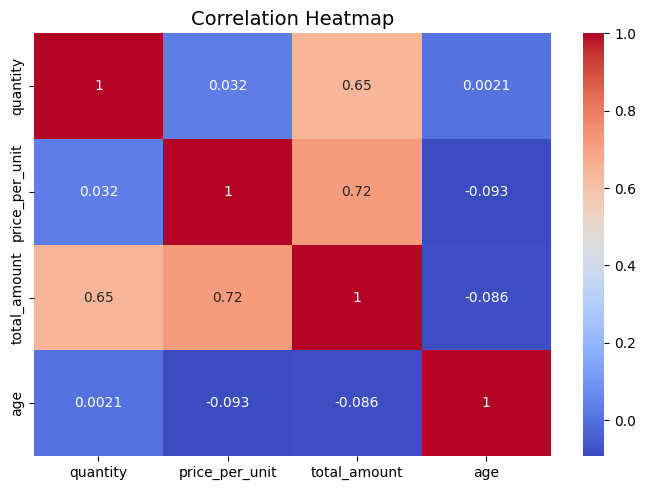

In [ ]:
# Heatmap of correlation matrix

plt.figure(figsize=(7, 5))
sns.heatmap(df_cleaned[['quantity', 'price_per_unit', 'total_amount', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()